# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


In [3]:
import pandas as pd
pd.DataFrame(X).mean()

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
779    0.000007
780    0.000000
781    0.000000
782    0.000000
783    0.000000
Length: 784, dtype: float64

### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

In [4]:
def P1(num_examples=10):
    """ P1 - Shows a 10xParam grid that visualizes the input number of examples of each digit. 
    # param num_examples: integer that indicates the number of examples to display
    # return: None
    """
    
    #set example index array
    my_examples = []

    #loop to get values 0-9
    for i in range(0,10):
        val = str(i) 
        #get indeicies for labels of 'i'
        sub_y = np.where(Y == val)
        #get num_examples amount of indicies
        for j in range(0,num_examples):
            my_index = np.random.choice(sub_y[0], 1, replace=False)
            my_examples.append(my_index[0])
 
    #set initial location for grid
    loc = 1

    #loop through all indicies
    for k in my_examples:
        #create grid of image examples
        plt.subplot(10,num_examples,loc)
        loc += 1
        im = np.reshape(X[k], (28, 28))
        plt.imshow(im, cmap='gray')
        plt.xticks([])
        plt.yticks([])  
        

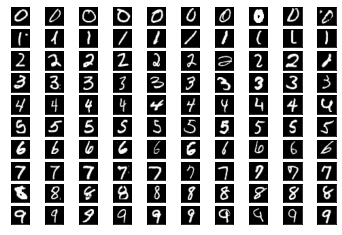

In [5]:
P1(10)

### Part 2:

Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  Evaluate and show the performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label. Which is the most difficult digit?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [8]:
def P2(k_values):
    """ P2 - Produces a k-NN model for different input values of k, then evaluates the performance of each model.
                For just 1NN, shows the precision, recall, and F1 for each label.
    # param k_values: list of input values for k
    # return: None
    """
    
    #iterate through all the k-values
    for i in k_values:
        #train the kNN model on 'i' neighbors with the mini train set
        knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski')
        knn.fit(mini_train_data, mini_train_labels)

        #predict on the dev set
        y_pred = knn.predict(dev_data)

        #show the precision, recall, and F1 for each label for the 1-NN model
        if i == 1:
            target_names = ['0','1','2','3','4','5','6','7','8','9']
            print('For ', i, ' Nearest Neighbor(s):')
            print(classification_report(dev_labels, y_pred, target_names=target_names))

        #evaluate the performace of each model    
        if i != 1:
            print('For ', i, ' Nearest Neighbor(s):')
        print('\t Misclassified examples: ', (dev_labels != y_pred).sum(),' (out of ', len(y_pred), ')' )
        error = (dev_labels != y_pred).sum()/len(y_pred)
        print('\t Prediction error: %.3f' % error)
        print('\t Prediction accuracy: %.3f'% (1-error))
        

In [9]:
k_values = [1, 3, 5, 7, 9]
P2(k_values)

For  1  Nearest Neighbor(s):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

	 Misclassified examples:  116  (out of  1000 )
	 Prediction error: 0.116
	 Prediction accuracy: 0.884
For  3  Nearest Neighbor(s):
	 Misclassified examples:  124  (out of  1000 )
	 Prediction error: 0.124
	 Pred

ANSWER: For the kNN model, with k = 1, the most dificult digit is 8, as it has the second lowest precision as well as the lowest recall and F1 score.

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [10]:
def P3(train_sizes, accuracies):
    """ P3 - Produces a 1NN model that uses training data of various sizes then evaluates the performance of each 
                model as well as the time to measure the performace of each model.
    # param train_sizes: list of different training size inputs
    # param accuracies: empty array to append the accuracy values for each training size
    # return: None
    """
    
    #iterate through all the training sizes 
    for i in train_sizes:
        overall_start = time.time()
        
        #shuffle the data
        shuffle = np.random.permutation(np.arange(train_data.shape[0]))
        input_shuffle, labels_shuffle = train_data[shuffle], train_labels[shuffle]
        #get the desired training data size
        input_subset = input_shuffle[0:i]
        labels_subset = labels_shuffle[0:i]

        #train the kNN model on 1 neighbor with the training data set
        knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
        knn.fit(input_subset, labels_subset)

        #predict on the dev set
        y_pred = knn.predict(dev_data)
        
        #calculate time needed to measure the performance of each model
        start = time.time()
        misclassified = (dev_labels != y_pred).sum()
        error = misclassified/len(y_pred)
        acc = 1 - error
        end = time.time()
        my_time = end - start
        total_time = end - overall_start

        #evaluate and show the performance of each model
        print('For training size: ', i)
        print('\t Misclassified examples: ', misclassified,' (out of ', len(y_pred), ')' )
        print('\t Prediction error: %.3f' % error)
        print('\t Prediction accuracy: %.3f'% acc)
        accuracies.append({i : acc})
        print('\t Total time: ', total_time, ' & Performace Time: ', my_time)
        
    print("Overall Accuracies: ", accuracies)
    

In [11]:
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

For training size:  100
	 Misclassified examples:  296  (out of  1000 )
	 Prediction error: 0.296
	 Prediction accuracy: 0.704
	 Total time:  0.30810022354125977  & Performace Time:  4.363059997558594e-05
For training size:  200
	 Misclassified examples:  219  (out of  1000 )
	 Prediction error: 0.219
	 Prediction accuracy: 0.781
	 Total time:  0.5077083110809326  & Performace Time:  4.315376281738281e-05
For training size:  400
	 Misclassified examples:  163  (out of  1000 )
	 Prediction error: 0.163
	 Prediction accuracy: 0.837
	 Total time:  0.7531638145446777  & Performace Time:  4.1961669921875e-05
For training size:  800
	 Misclassified examples:  137  (out of  1000 )
	 Prediction error: 0.137
	 Prediction accuracy: 0.863
	 Total time:  1.3603405952453613  & Performace Time:  4.267692565917969e-05
For training size:  1600
	 Misclassified examples:  102  (out of  1000 )
	 Prediction error: 0.102
	 Prediction accuracy: 0.898
	 Total time:  2.7166335582733154  & Performace Time:  4.

### Part 4:

Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.  What's wrong with using regression here?

Apply some transformation that makes the predictions more reasonable.  Show $R^2$ of the improved regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Notes:
* Train the regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.

In [12]:
def P4():
    """ P4 - Produces a regression model that predicts the accuracy of a 1NN model, given the training set size.
                Shows the R2 and predicted accuracies for training sizes 60000, 120000, and 1000000. Then displays
                a line plot for both actual and predicted accuracies. Also, transforms the accuracy labels to be more
                reasonable and then displays the R2, predicted values, and updated line plot.
    # param: None
    # return: None
    """
    
    #set initial values
    my_acc = []
    my_sizes = []

    #get accuracies from the array produced from the previous problem
    for i in accuracies:
        my_acc.append(list(i.values())[0])
        my_sizes.append(list(i.keys())[0])

    #reshape arrays for linear regression input
    transformed_acc = np.reshape(my_acc, (-1, 1))
    transformed_sizes = np.reshape(my_sizes, (-1, 1))
    
    #build linear regression model and print R2 score
    reg = LinearRegression().fit(transformed_sizes, transformed_acc)
    print("R2 Score: ", reg.score(transformed_sizes, transformed_acc))

    #predict accuracies for different training sizes
    tr_sizes = [[60000],[120000],[1000000]]
    est_acc = reg.predict(tr_sizes)
    print("\t Predictions for ", tr_sizes[0], " = ", est_acc[0])
    print("\t Predictions for ", tr_sizes[1], " = ", est_acc[1])
    print("\t Predictions for ", tr_sizes[2], " = ", est_acc[2])

    #get predicted values
    pred_acc = reg.predict(transformed_sizes)
    my_pred_acc = []
    for j in pred_acc:
        my_pred_acc.append(j[0])
        
    #plot actual & predicted values
    print("\n Actual & Predicted Accuracies vs. Training Set Size")
    plt.plot(my_sizes, my_acc, "-b", label="Actual")
    plt.plot(my_sizes, my_pred_acc, "-r", label="Predicted") 
    plt.legend(loc="upper left")
    plt.show()
    
    #answer 'What's wrong with using regression here?'
    print("\nLinear regression is wrong here because the values are not linear. So, trying to fit them to a linear",
              "model does not necessarily work the best.")
    
    #apply transformation to accuracy inputs
    pwr_acc = []
    for k in range(0,len(my_acc)):
        pwr_acc.append((my_acc[k])**len(my_acc))
    
    #fit a new linear model and print the improved R2 score
    reg2 = LinearRegression().fit(transformed_sizes, pwr_acc)
    print("\nImproved R2 Score: ", reg2.score(transformed_sizes, pwr_acc))

    #predict accuracies for different training sizes
    est_acc2 = reg2.predict(tr_sizes)
    print("\t Predictions for ", tr_sizes[0], " = ", est_acc2[0])
    print("\t Predictions for ", tr_sizes[1], " = ", est_acc2[1])
    print("\t Predictions for ", tr_sizes[2], " = ", est_acc2[2])

    #get predicted values
    pred_acc2 = reg2.predict(transformed_sizes)
    
    #plot actual & predicted values
    print("\n(Transformed) Actual & Predicted Accuracies vs. Training Set Size")
    plt.plot(my_sizes, pwr_acc, "-b", label="Actual")
    plt.plot(my_sizes, pred_acc2, "-r", label="Predicted")
    plt.legend(loc="upper left")
    plt.show()
    

R2 Score:  0.4257873399200556
	 Predictions for  [60000]  =  [1.23266895]
	 Predictions for  [120000]  =  [1.62968518]
	 Predictions for  [1000000]  =  [7.45258983]

 Actual & Predicted Accuracies vs. Training Set Size


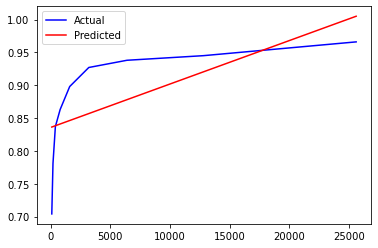


Linear regression is wrong here because the values are not linear. So, trying to fit them to a linear model does not necessarily work the best.

Improved R2 Score:  0.6654462915694176
	 Predictions for  [60000]  =  1.6144854249441087
	 Predictions for  [120000]  =  2.980629837601252
	 Predictions for  [1000000]  =  23.017414556572678

(Transformed) Actual & Predicted Accuracies vs. Training Set Size


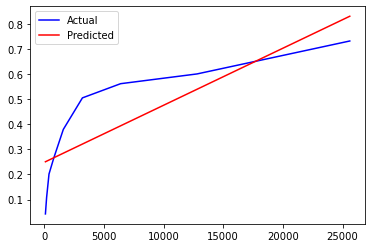

In [13]:
P4()

ANSWER: The original R2 value is 0.42, which means that the does not fit the data very well. Linear regression is wrong here because the values are not linear. By observing the original linplot, we can see that the predictions follow a logarithmic curve. So, trying to fit them to a linear model does not necessarily work very well. As a result, an exponential transformation was applied to make the predictions more reasonable and linear. Then, the R2 value went up to 0.67, indicating that the model was then a better fit of the data.

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

In [14]:
def erin_confusion_matrix_plot(conf_matrix):
    """ erin_confusion_matrix_plot - custom user function to produce a confusion matrix plot
    # param conf_matrix: nested list of TP, TN, FP, FN
    # return: None
    """
    
    #plot the confusion matrix
    plt.matshow(conf_matrix, cmap=plt.cm.Blues)
    for i in range(conf_matrix.shape[0]):
            for j in range(conf_matrix.shape[1]):
                plt.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')
    
    #adjust ticks and labels
    plt.xticks([0,1,2,3,4,5,6,7,8,9]) 
    plt.yticks([0,1,2,3,4,5,6,7,8,9])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    #show the plot
    plt.show()
    

In [15]:
def P5():
    """ P5 - Produces a 1NN model, shows the confusion matrix, prints the pair of digits the model confuses most 
                often, and displays the images of those most often confused difits.
    # param: None
    # return: None
    """
    
    #build 1NN model trained onthe mini train set
    knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
    knn.fit(mini_train_data, mini_train_labels)

    #predict on the dev set
    y_pred = knn.predict(dev_data)

    #performance of dev set
    print('Performance on dev set:')
    print('\t Misclassified examples: ', (dev_labels != y_pred).sum(),' (out of ', len(y_pred), ')' )
    error = (dev_labels != y_pred).sum()/len(y_pred)
    print('\t Prediction error: %.3f' % error)
    print('\t Prediction accuracy: %.3f'% (1-error))

    #plot the confusion matrix
    conf_matrix = confusion_matrix(dev_labels, y_pred)
    erin_confusion_matrix_plot(conf_matrix)
    
    #set values for finding the most confused pair
    my_max = 0
    x_index = 0
    y_index = 0
    row = -1

    #iterate through the confusion matrix to find the most confused pair 
    for i in conf_matrix[:,]:
        row += 1
        col = -1
        for j in i:
            col += 1
            if col != row:
                if j > my_max:
                    my_max = j
                    #true label
                    x_index = row
                    #predicted label
                    y_index = col

    print("Pair of digits most often confused is: True Label = ", x_index, " & Predicted Label = ", y_index,
          " with ", my_max, " misclassifications.")

    #set values for finding the images of most condused pair
    my_indexes = []
    my_y = str(y_index)
    my_x = str(x_index)

    #interate through actual/predected labels to get the indexes of images to plot
    for k in range(0,len(y_pred)):
        pred_val = y_pred[k]
        actual_val = dev_labels[k]

        if pred_val != actual_val:
            if pred_val == my_y and actual_val == my_x:
                my_indexes.append(k)
    
    #plot the most confused pair images
    loc = 1
    print("Most often confused images of ", my_x, " (actual) with ", my_y, " (predicted) :")

    #loop through all indicies
    for k in my_indexes:
        #create grid of image examples
        plt.subplot(1,len(my_indexes),loc)
        loc += 1
        im = np.reshape(dev_data[k], (28, 28))
        plt.imshow(im, cmap='gray')
        

Performance on dev set:
	 Misclassified examples:  116  (out of  1000 )
	 Prediction error: 0.116
	 Prediction accuracy: 0.884


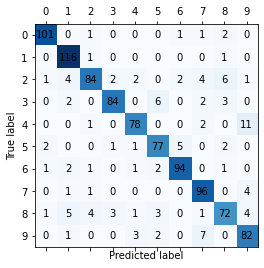

Pair of digits most often confused is: True Label =  4  & Predicted Label =  9  with  11  misclassifications.
Most often confused images of  4  (actual) with  9  (predicted) :


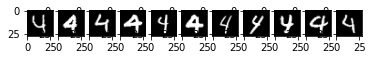

In [16]:
P5()

ANSWER: The pair of digits most often confused are 4 (actual label) and 9 (predicted label). We can see some example images where the model precdicted the label to be 9 when it should have been 4. Some people write 4's to look more like 9's, so it makes sense that these values are the most commonly confused pair of digits.

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Apply your blur filter in 3 ways:
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracy resulting no filter and from each way you apply the filter.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [17]:
def erin_smoothing(my_ex):
    """ erin_smoothing - Produces a new "blurred" image-array, by average the 8 neighboring pixels and the 
                original value to get a new, smoothed value.
    # param: my_ex: The original image-array, in matrix form.
    # return: new_ex: The blurred image array.
    """

    #initialize output variable
    new_ex = []

    #iterate through all values in order to blur
    for i in range(0, len(my_ex)):
        
        #top and bottom rows:
        if i == 0 or i == 27:
            
            #top row
            if i == 0:
                for j in range(0,len(my_ex[i])):
                    
                    #first or last cell
                    if j == 0 or j == 27:
                        
                        #first cell - corner case
                        if j == 0:
                            total = my_ex[i][j+1] + my_ex[i+1][j+1] + my_ex[i+1][j] + my_ex[i][j]
                            new_val = total/4
                            new_ex.append(new_val)
                        
                        #last cell - corner case  
                        if j == 27:
                            total = my_ex[i+1][j] + my_ex[i+1][j-1] + my_ex[i][j-1] + my_ex[i][j]
                            new_val = total/4
                            new_ex.append(new_val)
                    
                    #regular case for first row        
                    else:
                        total = my_ex[i][j+1] + my_ex[i+1][j+1] + my_ex[i+1][j] + my_ex[i+1][j-1] + my_ex[i][j-1] + my_ex[i][j]
                        new_val = total/6
                        new_ex.append(new_val)

            #last row            
            if i == 27:
                for i in range(0,len(my_ex[i])):
                    
                    #first or last cell
                    if j == 0 or j == 27:
                        
                        #first cell - corner case
                        if j == 0:
                            total = my_ex[i-1][j] + my_ex[i-1][j+1] + my_ex[i][j+1] + my_ex[i][j]
                            new_val = total/4
                            new_ex.append(new_val)

                        #last cell - corner case   
                        if j == 27:
                            total = my_ex[i-1][j] + my_ex[i-1][j-1] + my_ex[i][j-1] + my_ex[i][j]
                            new_val = total/4
                            new_ex.append(new_val)
                    
                    #regular case for last row
                    else:
                        total = my_ex[i][j+1] + my_ex[i+1][j+1] + my_ex[i+1][j] + my_ex[i+1][j-1] + my_ex[i][j-1] + my_ex[i][j]
                        new_val = total/6
                        new_ex.append(new_val)

        #non-edge rows            
        else:
            for j in range(0,len(my_ex[i])): 
                
                #edge cells
                if j == 0 or j == 27:  
                    
                    #first cell
                    if j == 0:
                        total = my_ex[i-1][j] + my_ex[i-1][j+1] + my_ex[i][j+1] + my_ex[i+1][j+1] + my_ex[i+1][j] + my_ex[i][j]
                        new_val = total/6
                        new_ex.append(new_val)

                    #last cell
                    if j == 27:
                        total = my_ex[i-1][j-1] + my_ex[i-1][j] + my_ex[i+1][j] + my_ex[i+1][j-1] + my_ex[i][j-1] + my_ex[i][j]
                        new_val = total/6
                        new_ex.append(new_val)
                
                #regular case for non-edge rows and cells
                else:
                    total = my_ex[i-1][j-1] + my_ex[i-1][j] + my_ex[i-1][j+1] + my_ex[i][j+1] + my_ex[i+1][j+1] + my_ex[i+1][j] + my_ex[i+1][j-1] + my_ex[i][j-1] + my_ex[i][j]
                    new_val = total/9
                    new_ex.append(new_val)
     
    return(new_ex)


In [18]:
def erin_blur_df(my_copy):
    """ erin_blur_df - Produces a new "blurred" data frame, where each row is a blurred image-array.
    # param: my_copy: The copy of the original data set.
    # return: new_copy: The new blurred data set.
    """

    #initialize output variable
    new_copy = np.zeros(shape=my_copy.shape)

    #iterate through each image-array in the data set
    for k in range(0,len(my_copy)):

        #get image-array and turn it into matrix for blurring function input
        my_ex = my_copy[k]
        my_ex = my_ex.reshape(28,28)

        #get blurred array
        temp = erin_smoothing(my_ex)

        #add blurred image-arrage to new data set
        new_copy[k] = temp
        
    return(new_copy)


In [19]:
def erin_accuracy(labels, predictions):
    """ erin_accuracy - Produces a new "blurred" data frame, where each row is a blurred image-array.
    # param: labels: The true labels for the evaluation data.
    # param: predictions: The predicted labels for the evaluation data.
    # return: None
    """

    #print out accuracies for a model
    print('\t Misclassified examples: ', (labels != predictions).sum(),' (out of ', len(predictions), ')' )
    error = (labels != predictions).sum()/len(predictions)
    print('\t Prediction error: %.3f' % error)
    print('\t Prediction accuracy: %.3f'% (1-error))
    

In [20]:
def P6():
    """ P6 - Shows the accuracy of a 1NN model with blurred/non-blurred training/dev data.
    # param: None
    # return: None
    """
    
    #make copies of the mini train and dev data sets
    mini_train_data_copy = mini_train_data.copy()
    dev_data_copy = dev_data.copy()
    
    #make a blurred copy of the mini train and dev data sets
    blurred_mini_train_data = erin_blur_df(mini_train_data_copy)
    blurred_dev_data = erin_blur_df(dev_data_copy)
    
    print("No filter: ")
    
    #train the kNN model on 1 neighbor with the mini train set
    knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
    knn.fit(mini_train_data, mini_train_labels)

    #predict on the dev set
    y_pred = knn.predict(dev_data)
    
    #print accuracies
    erin_accuracy(dev_labels, y_pred)
    
    print("Filter the training data but not the dev data: ")
    
    #train the kNN model on 1 neighbor with the blurred mini train set
    knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
    knn.fit(blurred_mini_train_data, mini_train_labels)

    #predict on the dev set
    y_pred = knn.predict(dev_data)
    
    #print accuracies
    erin_accuracy(dev_labels, y_pred)
    
    print("Filter the dev data but not the training data: ")
    
    #train the kNN model on 1 neighbor with the mini train set
    knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
    knn.fit(mini_train_data, mini_train_labels)

    #predict on the blurred dev set
    y_pred = knn.predict(blurred_dev_data)
    
    #print accuracies
    erin_accuracy(dev_labels, y_pred)
    
    print("Filter both training data and dev data: ")
    
    #train the kNN model on 1 neighbor with the blurred mini train set
    knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
    knn.fit(blurred_mini_train_data, mini_train_labels)

    #predict on the blurred dev set
    y_pred = knn.predict(blurred_dev_data)
    
    #print accuracies
    erin_accuracy(dev_labels, y_pred)


In [21]:
P6()

No filter: 
	 Misclassified examples:  116  (out of  1000 )
	 Prediction error: 0.116
	 Prediction accuracy: 0.884
Filter the training data but not the dev data: 
	 Misclassified examples:  93  (out of  1000 )
	 Prediction error: 0.093
	 Prediction accuracy: 0.907
Filter the dev data but not the training data: 
	 Misclassified examples:  132  (out of  1000 )
	 Prediction error: 0.132
	 Prediction accuracy: 0.868
Filter both training data and dev data: 
	 Misclassified examples:  95  (out of  1000 )
	 Prediction error: 0.095
	 Prediction accuracy: 0.905


### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter.  Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data.  Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [22]:
#make copies of the mini training data
copy_mini_data = mini_train_data.copy()
copy_mini_labels = mini_train_labels.copy()

#iterate through all values in order to map them to either 0, 1, or 2
for i in range(0,len(mini_train_data)):
    for j in range(0, len(mini_train_data[i])):
        if mini_train_data[i][j] <= 0.2:
            copy_mini_data[i][j] = '0'
        elif mini_train_data[i][j] <= 0.8:
            copy_mini_data[i][j] = '1'
        else:
            copy_mini_data[i][j] = '2'

In [23]:
def P7():
    """ P7 - Produces two Naive Bayes model implementations: Bernoulli & Multinomial. Then compares the accuracy
                of each model and evaluates their performance.
    # param: None
    # return: None
    """
    
    #build Bernoulli NB model trained on the mini_train_data
    BNBclf = BernoulliNB(binarize=0.3)
    BNBclf.fit(mini_train_data, mini_train_labels)
    
    #evaluate on the dev data
    BNBy_pred = BNBclf.predict(dev_data)
    
    #show Bernoulli model accuracy
    print('Bernoulli Misclassified examples: ', (dev_labels != BNBy_pred).sum(),' (out of ', len(BNBy_pred), ')' )
    error = (dev_labels != BNBy_pred).sum()/len(BNBy_pred)
    print('Bernoulli Prediction error: %.3f' % error)
    print('Bernoulli Prediction accuracy: %.3f'% (1-error))
    
    #build Multinomial NB model trained on the pre-processed categorial version of the mini training data
    MNBclf = MultinomialNB()
    MNBclf.fit(copy_mini_data, copy_mini_labels)
    
    #evaluate on the dev data
    MNBy_pred = MNBclf.predict(dev_data)
    
    #show the Multinomial model accuracy
    print('\nMultinomial Misclassified examples: ', (dev_labels != MNBy_pred).sum(),' (out of ', len(MNBy_pred), ')' )
    error = (dev_labels != MNBy_pred).sum()/len(MNBy_pred)
    print('Mulitnomial Prediction error: %.3f' % error)
    print('Multinomail Prediction accuracy: %.3f'% (1-error))


In [24]:
P7()

Bernoulli Misclassified examples:  173  (out of  1000 )
Bernoulli Prediction error: 0.173
Bernoulli Prediction accuracy: 0.827

Multinomial Misclassified examples:  186  (out of  1000 )
Mulitnomial Prediction error: 0.186
Multinomail Prediction accuracy: 0.814


ANSWER: The multinomial version does not necessarily improve the results. Multinomial Naive Bayes estimates the conditional probability of a particular value given a class as the relative frequency of that value. These MNIST images are largely made up of black and white pixels. Most pixel values take on the extreme ends of the continous range between [0,1]. As a result, there are fewer pixels that can be classified as "grey". So, adding a category classification for grey pixels is not as descriptive for our model. This additional feature classification does not provide greater image-label representation. Thus, the multinomial classification does not improve the accuracy of the Naive Bayes model.

### Part 8:

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Train on the mini train set.
* Vary alpha and evaulate performance using `GridSearchCV` to cross-validate.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [25]:
def P8(alphas):
    """ P8 - Produces a Bernoulli Naive Bayes model with different LaPlace smoothing parameter values. Then compares
                the accuracies for for each alpha value.
    # param: alphas: Dictionary for different alpha smoothing values. 
    # return: clf: the Bernoulli NB model that is cross-validated with GridSearchCV.
    """
    
    #train and cross-validate Bernoulli NB model
    Bclf = BernoulliNB()
    clf = GridSearchCV(Bclf, alphas)
    
    #fit the model to the mini train set
    clf.fit(mini_train_data, mini_train_labels)
    
    #show accuracy at each alpha value
    my_a = alphas.get('alpha')
    my_accuracies = clf.cv_results_['mean_test_score']
    for i in range(0,len(my_a)):
        print('Alpha = ', my_a[i], ' & Accuracy = ', my_accuracies[i])
      
    #return the cross-validated model
    return(clf)


In [26]:
alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print("Best alpha = ", nb.best_params_)

Alpha =  1e-10  & Accuracy =  0.8139999999999998
Alpha =  0.0001  & Accuracy =  0.819
Alpha =  0.001  & Accuracy =  0.825
Alpha =  0.01  & Accuracy =  0.8219999999999998
Alpha =  0.1  & Accuracy =  0.818
Alpha =  0.5  & Accuracy =  0.8130000000000001
Alpha =  1.0  & Accuracy =  0.8089999999999999
Alpha =  2.0  & Accuracy =  0.8049999999999999
Alpha =  10.0  & Accuracy =  0.783

Best alpha =  {'alpha': 0.001}


ANSWER: The best value for alpha is 0.001. The accuracy when alpha is near 0 is about 81%, which is only slightly less than the best accuracy of 82.5% and better than the accuracy for alpha = 10 (78%). Although this is not what I expected as alpha = 1e-10 is almost no smoothing, this makes sense as LaPlace smoothing attempts to solve the problem of zero-probability and zero values. This is particularly helpful as we are dealing with categorical values between 0 and 1, many of which are zero.  

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [27]:
def P9():
    """ P9 - Produces a Gaussian Naive Bayes model and an improved Gaussian Naive Bayes model. The performance of each
                model is then compared and the effects of theta and sigma are considered.
    # param: None 
    # return: None
    """
    
    #build Bernoulli NB model trained on the mini_train_data
    GNBclf1 = GaussianNB()
    GNBclf1.fit(mini_train_data, mini_train_labels)

    #evaluate on the dev data
    GNB1y_pred = GNBclf1.predict(dev_data)
    print("Basic Guassian Naive Bayes Performance: ")
    erin_accuracy(dev_labels, GNB1y_pred)
    
    #build Bernoulli NB model trained on the mini_train_data
    GNBclf2 = GaussianNB(var_smoothing=0.07)
    GNBclf2.fit(mini_train_data, mini_train_labels)

    #evaluate on the dev data
    GNB2y_pred = GNBclf2.predict(dev_data)
    print("Improved Guassian Naive Bayes Performance: ")
    erin_accuracy(dev_labels, GNB2y_pred)
    
    #consider the effects of theta
    if len(np.where(np.isclose(GNBclf1.theta_, GNBclf2.theta_))[0]) > 0:
        print("Mean of each feature per class is roughly the same.")
    else:
        print("Mean of each feature per class changes with smoothing.")
    
    #consider the effects of sigma
    if len(np.where(np.isclose(GNBclf1.sigma_, GNBclf2.sigma_))[0]) > 0:
        print("Variance of each feature per class is roughly the same.")
    else:
        print("Variance of each feature per class changes with smoothing.")
        

In [28]:
P9()

Basic Guassian Naive Bayes Performance: 
	 Misclassified examples:  407  (out of  1000 )
	 Prediction error: 0.407
	 Prediction accuracy: 0.593
Improved Guassian Naive Bayes Performance: 
	 Misclassified examples:  181  (out of  1000 )
	 Prediction error: 0.181
	 Prediction accuracy: 0.819
Mean of each feature per class is roughly the same.
Variance of each feature per class changes with smoothing.


ANSWER: The Gaussian Naive Bayes model assumes that continuous features follow a normal distribution. So, the classifier uses all the values observed for a given feature to estimate the Gaussian distribution from which those values are assumed to have been sampled. The Gaussian distributions are estimated to represent all features the exact same with infinite variance. The model most likely had poor performace because the pixel values do not follow a normal distribution. So, I applied a simple fix of setting the var_smoothing parameter. By adding var_smoothing = 0.07 to the GNB model, the portion of the largest variance of all features was added to the variances for calculation stability. This, then, improved the accuracy of the model by helping to maintain the assumption that the features follow a normal distribution, thus improving the model performace to roughly 81% which is around the same performace as the Bernoulli Naive Bayes model. As a result, we see that there is little effect on theta, which represents the mean of each feature per class, but there is indeed an effect on sigma, the variance of each feature per class.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

In [29]:
def P10(num_examples):
    """ P10 - Produces a Bernoulli Naive Bayes model that is then used to determine the probability that a given pixel
                will be 0 or 1, given the image label. That probability is compared to a random number that then 
                determines the pixel value (0 or 1) for a new image. A 10 x num_examples grid is then displayed, 
                showing the resulting binirized examples.
    # param: num_examples: integer that indicates the number of examples to display  
    # return: None
    """
    
    #build Bernoulli NB model trained on the mini_train_data
    BNBclf = BernoulliNB()
    BNBclf.fit(mini_train_data, mini_train_labels)

    #evaluate on the dev data
    BNBy_pred = BNBclf.predict(dev_data)
    
    #initialize variables
    label_count = 0
    my_label = 0
    X_binirized = []

    #iterate through the amount of examples needed for grid
    for i in range(0,num_examples*10):
        new_ex = []

        #reset variables to update label when necessary
        if label_count == num_examples:
            my_label += 1
            label_count = 0

        #get probabilities for each pixel for given label
        my_probs = np.exp(BNBclf.feature_log_prob_)[my_label]

        #iterate through each pixel value and compare with random value
        for j in my_probs:
            my_rand = np.random.rand()
            
            #if random value greater than probability, value if zero, else 1
            if my_rand > j:
                new_ex.append(0)
            else:
                new_ex.append(1)

        #add new image to matrix of examples
        X_binirized.append(new_ex)
        label_count += 1
        
    #set initial location for grid
    loc = 1
    
    #loop through all indicies
    for k in range(0,len(X_binirized)):   
        #create grid of image examples
        plt.subplot(10,num_examples,loc)
        loc += 1
        im = np.reshape(X_binirized[k], (28, 28))
        plt.imshow(im, cmap='gray')
        plt.xticks([])
        plt.yticks([])


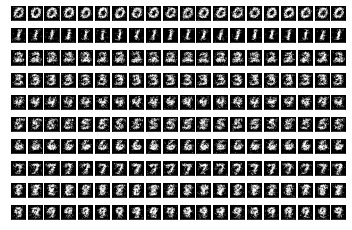

In [30]:
P10(20)

ANSWER: The generated images are almost like blurred versions of the originial training digit images. Some examples are more obvious than others. Like, the zeros and ones are still somewhat clear, but the three's and four's are very blurry compared to the original images. This is most likely because the probabilities are being compared with a random integer for every pixel, so there are bound to be some extra random white pixels throughout the image.

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Train on the mini train set.
* Evaluate perfromance on the dev set.
* Apply a reasonable Laplace smoothing (alpha) value.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [31]:
def P11(buckets, correct, total):
    """ P11 - Produces a Bernoulli Naive Bayes model. Then, partitions the dev data set into buckets based on each
                images' posterior probability. The accuracies for each bucket are then displayed.
    # param: buckets: array with posterior probability bucket value
    # param: correct: the number of correct classification for each bucket value
    # param: total: the number of total classifications for each bucket value
    # return: None
    """
    
    #build Bernoulli NB model trained on the mini_train_data
    BNBclf = BernoulliNB(alpha = 0.001)
    BNBclf.fit(mini_train_data, mini_train_labels)
    
    #iterate through each image in the dev data set
    for i in range(0,len(dev_data)):
        #get the max posterior probability and its index, indicating the predicted label
        max_val = max(BNBclf.predict_proba(dev_data)[i])
        pp = np.argmax(BNBclf.predict_proba(dev_data)[i])
        
        #get the actual label for the given image
        actual_label = dev_labels[i]

        #initialize variables
        my_index = 0

        #set the bucket for the max posterior probability
        for j, e in (enumerate(buckets)):
            if max_val >= e:
                my_index = j

        #check to see if the prediction was correct and increment the corresponding value for that bucket
        if str(pp) == actual_label:
            correct[my_index] += 1

        #increment the corresponding total value for that bucket
        total[my_index] += 1 


In [32]:
buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =  31    accuracy = 0.355
p(pred) is 0.5000000000000 to 0.9000000000000    total =  67    accuracy = 0.433
p(pred) is 0.9000000000000 to 0.9990000000000    total =  59    accuracy = 0.458
p(pred) is 0.9990000000000 to 0.9999900000000    total =  46    accuracy = 0.652
p(pred) is 0.9999900000000 to 0.9999999000000    total =  62    accuracy = 0.774
p(pred) is 0.9999999000000 to 0.9999999990000    total =  33    accuracy = 0.788
p(pred) is 0.9999999990000 to 0.9999999999900    total =  43    accuracy = 0.791
p(pred) is 0.9999999999900 to 0.9999999999999    total =  19    accuracy = 0.842
p(pred) is 0.9999999999999 to 1.0000000000000    total = 640    accuracy = 0.941


ANSWER: The majority of the images are in the bucket with with highest posterior probability (100%) with 94% accuracy, indicating a strong calibration. Additionally, very few images have a posterior probability less than 0.9. But, the remaining images, with probailities from 0.9 to 0.9999999999999, have accuracies roughly from 45-85%, indicating a slightly weaker calibration. Yet, there is a positive correlation between posterior probability and accuracy, which means this is a sufficiently well calibrated Bernoulli Naive Bayes model.

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

Pre-process the mini train and dev data with additional new features:

In [33]:
#initialize new feature columns
row_sum_array = []
col_sum_array = []
row_avg = []
col_avg = []
enclosed_regions = []
block2_sum = []
block2_avg = []
blk_pixel_count = []
wht_pixel_count = []
th_wht = []
bh_wht = []

#iterate through all the data
for k in range(0, len(mini_train_data)):

    #get different shapes and sections of the individual image
    temp = np.reshape(mini_train_data[k], (28, 28))
    top_half = mini_train_data[k][0:392]
    bottom_half = mini_train_data[k][392:784]

    #sum the pixel values in each row
    row_sum = np.sum(temp, axis=1)
    row_sum_array.append(row_sum)

    #average the pixel values in each row
    my_row_avg = np.mean(temp, axis=1)
    row_avg.append(my_row_avg)

    #sum the pixel values in each column
    col_sum = np.asarray([sum(x) for x in zip(*temp)])
    col_sum_array.append(col_sum)

    #average the pixel values in each column
    my_col_avg = np.mean(temp, axis=0)
    col_avg.append(my_col_avg)

    #count the number of enclosed regions
    if mini_train_labels[k] == '8':
        enclosed_regions.append([2])
    elif mini_train_labels[k] == '0' or mini_train_labels[k] == '6' or mini_train_labels[k] == '9':
        enclosed_regions.append([1])
    else:
        enclosed_regions.append([0])
    
    #get the sum value for the 7x7 square block of pixels
    m,n = temp.shape
    p,q = (7,7) # Block size
    b = temp.reshape(m//p,p,n//q,q).sum((1,3), keepdims=1)
    block2_sum.append(b.ravel())
    
    #get the average value for the 7x7 square block of pixels
    m,n = temp.shape
    p,q = (7,7) # Block size
    b = temp.reshape(m//p,p,n//q,q).mean((1,3), keepdims=1)
    block2_avg.append(b.ravel())
    
    #get the number of black pixels
    blk_pixels = np.count_nonzero(mini_train_data[k]==0)
    blk_pixel_count.append([blk_pixels])
    
    #get the number of light pixels
    wht_pixels = np.count_nonzero(mini_train_data[k] > 0.4)
    wht_pixel_count.append([wht_pixels])
    
    #get the number of light pixels in the top half of the image
    wht_pixels = np.count_nonzero(top_half > 0.4)
    th_wht.append([wht_pixels])
    
    #get the number of light pixels in the bottom half of the image
    wht_pixels = np.count_nonzero(bottom_half > 0.4)
    bh_wht.append([wht_pixels])


In [34]:
#make a copy of the mini training data set
extra_mini_data = mini_train_data.copy()

In [35]:
#add the new feature columns to the copy of the mini training data set

extra_mini_data = np.append(extra_mini_data, row_sum_array, axis=1)
extra_mini_data = np.append(extra_mini_data, col_sum_array, axis=1)
#extra_mini_data = np.append(extra_mini_data, row_avg, axis=1)
#extra_mini_data = np.append(extra_mini_data, col_avg, axis=1)
extra_mini_data = np.append(extra_mini_data, enclosed_regions, axis=1)
#extra_mini_data = np.append(extra_mini_data, block2_sum, axis=1)
#extra_mini_data = np.append(extra_mini_data, block2_avg, axis=1)
#extra_mini_data = np.append(extra_mini_data, blk_pixel_count, axis=1)
extra_mini_data = np.append(extra_mini_data, wht_pixel_count, axis=1)
extra_mini_data = np.append(extra_mini_data, th_wht, axis=1)
extra_mini_data = np.append(extra_mini_data, bh_wht, axis=1)

In [36]:
#initialize new feature columns
dev_row_sum_array = []
dev_col_sum_array = []
dev_row_avg = []
dev_col_avg = []
dev_enclosed_regions = []
dev_block2_sum = []
dev_block2_avg = []
dev_blk_pixel_count = []
dev_wht_pixel_count = []
dev_th_wht = []
dev_bh_wht = []

#iterate through all the data
for k in range(0, len(dev_data)):

    #get different shapes and sections of the individual image
    temp = np.reshape(dev_data[k], (28, 28))
    top_half = dev_data[k][0:392]
    bottom_half = dev_data[k][392:784]

    #sum the pixel values in each row
    row_sum = np.sum(temp, axis=1)
    dev_row_sum_array.append(row_sum)

    #average the pixel values in each row
    my_row_avg = np.mean(temp, axis=1)
    dev_row_avg.append(my_row_avg)

    #sum the pixel values in each column
    col_sum = np.asarray([sum(x) for x in zip(*temp)])
    dev_col_sum_array.append(col_sum)

    #average the pixel values in each column
    my_col_avg = np.mean(temp, axis=0)
    dev_col_avg.append(my_col_avg)

    #count the number of enclosed regions
    if dev_labels[k] == '8':
        dev_enclosed_regions.append([2])
    elif dev_labels[k] == '0' or dev_labels[k] == '6' or dev_labels[k] == '9':
        dev_enclosed_regions.append([1])
    else:
        dev_enclosed_regions.append([0])
    
    #get the sum value for the 7x7 square block of pixels
    m,n = temp.shape
    p,q = (7,7) # Block size
    b = temp.reshape(m//p,p,n//q,q).sum((1,3), keepdims=1)
    dev_block2_sum.append(b.ravel())
    
    #get the average value for the 7x7 square block of pixels
    m,n = temp.shape
    p,q = (7,7) # Block size
    b = temp.reshape(m//p,p,n//q,q).mean((1,3), keepdims=1)
    dev_block2_avg.append(b.ravel())
    
    #get the number of black pixels
    blk_pixels = np.count_nonzero(dev_data[k]==0)
    dev_blk_pixel_count.append([blk_pixels])
    
    #get the number of light pixels
    wht_pixels = np.count_nonzero(dev_data[k] > 0.4)
    dev_wht_pixel_count.append([wht_pixels])
    
    #get the number of light pixels in the top half of the image
    wht_pixels = np.count_nonzero(top_half > 0.4)
    dev_th_wht.append([wht_pixels])
    
    #get the number of light pixels in the bottom half of the image
    wht_pixels = np.count_nonzero(bottom_half > 0.4)
    dev_bh_wht.append([wht_pixels])


In [37]:
#make a copy of the mini training data set
extra_dev_data = dev_data.copy()

In [38]:
#add the new feature columns to the copy of the dev data set

extra_dev_data = np.append(extra_dev_data, dev_row_sum_array, axis=1)
extra_dev_data = np.append(extra_dev_data, dev_col_sum_array, axis=1)
#extra_dev_data = np.append(extra_dev_data, dev_row_avg, axis=1)
#extra_dev_data = np.append(extra_dev_data, dev_col_avg, axis=1)
extra_dev_data = np.append(extra_dev_data, dev_enclosed_regions, axis=1)
#extra_dev_data = np.append(extra_dev_data, dev_block2_sum, axis=1)
#extra_dev_data = np.append(extra_dev_data, dev_block2_avg, axis=1)
#extra_dev_data = np.append(extra_dev_data, dev_blk_pixel_count, axis=1)
extra_dev_data = np.append(extra_dev_data, dev_wht_pixel_count, axis=1)
extra_dev_data = np.append(extra_dev_data, dev_th_wht, axis=1)
extra_dev_data = np.append(extra_dev_data, dev_bh_wht, axis=1)

In [39]:
def P12():
    """ P12 - Produces a Bernoulli Naive Bayes model. Then, adds different features from the MNIST data to the mini
                train and dev data to help improve the BNB model performance. The performace for each BNB model is 
                then displayed, showing an increased accuracy with the additional features.
    # param: None
    # return: None
    """
    
    #build Bernoulli NB model trained on the mini_train_data
    BNBclf = BernoulliNB()
    BNBclf.fit(mini_train_data, mini_train_labels)

    #evaluate on the dev data
    BNBy_pred = BNBclf.predict(dev_data)

    print("Original Features: \n")
    
    #show Bernoulli model accuracy
    print('Bernoulli Misclassified examples: ', (dev_labels != BNBy_pred).sum(),' (out of ', len(BNBy_pred), ')' )
    error = (dev_labels != BNBy_pred).sum()/len(BNBy_pred)
    print('Bernoulli Prediction error: %.3f' % error)
    print('Bernoulli Prediction accuracy: %.3f'% (1-error))
    
    print("\nAdditional Features: \n")
    
    #build Bernoulli NB model trained on the mini train data with extra features
    BNBclf_extra = BernoulliNB()
    BNBclf_extra.fit(extra_mini_data, mini_train_labels)

    #evaluate on the dev data with extra features
    BNBExtra_y_pred = BNBclf_extra.predict(extra_dev_data)

    #show Bernoulli model accuracy
    print('Bernoulli Misclassified examples: ', (dev_labels != BNBExtra_y_pred).sum(),' (out of ', len(BNBExtra_y_pred), ')' )
    error = (dev_labels != BNBExtra_y_pred).sum()/len(BNBExtra_y_pred)
    print('Bernoulli Prediction error: %.3f' % error)
    print('Bernoulli Prediction accuracy: %.3f'% (1-error))
    


In [40]:
P12()

Original Features: 

Bernoulli Misclassified examples:  191  (out of  1000 )
Bernoulli Prediction error: 0.191
Bernoulli Prediction accuracy: 0.809

Additional Features: 

Bernoulli Misclassified examples:  162  (out of  1000 )
Bernoulli Prediction error: 0.162
Bernoulli Prediction accuracy: 0.838


ANSWER: By adding more features to my data set, I was able to improve the Bernoulli Naive Bayes model accuracy by nearly 3%. The features that improved model performance were the sum of each image row, the sum of each image column, the number of enclosed regions for the given label, the number of white pixels in each image, and he number of white pixels in just the top and bottom half of the image respectively. Additional features were considered, such as the average of each row/column, the sum and average value for a block of cells, and the total number of black pixels in the image. However those did not seem to improve the performance further. As a result, some model improvement was achieved by designing new features.